In [68]:
#!pip install akshare quantstats

import warnings
warnings.filterwarnings('ignore')
import time
import akshare as ak
import numpy as np
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# %matplotlib inline

In [69]:
etf_510050 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510050.csv")
etf_510300 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510300.csv")
etf_510500 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510500.csv")
etf_159915 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159915.csv")
etf_159901 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159901.csv")
etf_588000 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\588000.csv")

In [70]:
etf_510050 = etf_510050[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510300 = etf_510300[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510500 = etf_510500[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159915 = etf_159915[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159901 = etf_159901[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_588000 = etf_588000[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')

In [71]:
# Change the name of a column
etf_510050 = etf_510050.rename(columns={'AccumulatedUnitNV': "etf_510050"})
etf_510300 = etf_510300.rename(columns={'AccumulatedUnitNV': "etf_510300"})
etf_510500 = etf_510500.rename(columns={'AccumulatedUnitNV': "etf_510500"})
etf_159915 = etf_159915.rename(columns={'AccumulatedUnitNV': "etf_159915"})
etf_159901 = etf_159901.rename(columns={'AccumulatedUnitNV': "etf_159901"})
etf_588000 = etf_588000.rename(columns={'AccumulatedUnitNV': "etf_588000"})

In [72]:
len(etf_510050), len(etf_510300), len(etf_510500),len(etf_159915),len(etf_159901),len(etf_588000)

(4481, 2701, 2503, 2825, 4192, 630)

In [73]:
# 合并数据
data = pd.concat([etf_510050, etf_510300], axis=1)
data = pd.concat([data, etf_159915], axis=1)
data = pd.concat([data, etf_159901], axis=1)
data = pd.concat([data, etf_588000], axis=1)
data.index = pd.to_datetime(data.index)

In [74]:
data = data[3405:]

In [75]:
# 计算每日涨跌幅和滚动收益率
data["etf_510050_day_return"] = data.etf_510050.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_510300_day_return"] = data.etf_510300.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159915_day_return"] = data.etf_159915.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159901_day_return"] = data.etf_159901.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_588000_day_return"] = data.etf_588000.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])

In [76]:
# 生成交易信号和收益率_21
data["etf_510050_return"] = data.etf_510050.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_510300_return"] = data.etf_510300.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159915_return"] = data.etf_159915.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159901_return"] = data.etf_159901.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_588000_return"] = data.etf_588000.rolling(window=21).apply(lambda x: x[-1]/x[0])

In [77]:
data = data.iloc[21:,:]

In [78]:
data["signal_510050"] = [0] * len(data)
data["signal_510300"] = [0] * len(data)
data["signal_159915"] = [0] * len(data)
data["signal_159901"] = [0] * len(data)
data["signal_588000"] = [0] * len(data)

In [79]:
for row in range(len(data)):
    value = data.iloc[row][10:15].max()
    series = data.iloc[row]
    position = series[series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position + 5
    data.loc[data.index[row],series.index[new_position]] = 1

In [80]:
data["signal_510050"] = data["signal_510050"].shift(1)
data["signal_510300"] = data["signal_510300"].shift(1)
data["signal_159915"] = data["signal_159915"].shift(1)
data["signal_159901"] = data["signal_159901"].shift(1)
data["signal_588000"] = data["signal_588000"].shift(1)

In [81]:
data = data[1:]

In [82]:
data["signal_return_21"] = [0] * len(data)
arr = []
for row in range(len(data)):
    value = data.iloc[row][15:20].max()
    series = data.iloc[row]
    position = series[15:20][series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position - 10
    arr.append(series[new_position] + 1)

#     data.loc[data.index[row],'signal_return_21'] = np.cumprod((series[new_position] + 1))*100
data['arr'] = arr
data["signal_return_21"] = np.cumprod(arr, axis=0)*100

In [83]:
#####################################################################
data['signal_return_21'] = data['signal_return_21']*(100/data.loc[:,"signal_return_21"][0])
data['etf_510050_return'] = data['etf_510050_return']*(100/data.loc[:,"etf_510050_return"][0])
data['etf_510300_return'] = data['etf_510300_return']*(100/data.loc[:,"etf_510300_return"][0])
data['etf_159915_return'] = data['etf_159915_return']*(100/data.loc[:,"etf_159915_return"][0])
data['etf_159901_return'] = data['etf_159901_return']*(100/data.loc[:,"etf_159901_return"][0])
data['etf_588000_return'] = data['etf_588000_return']*(100/data.loc[:,"etf_588000_return"][432])

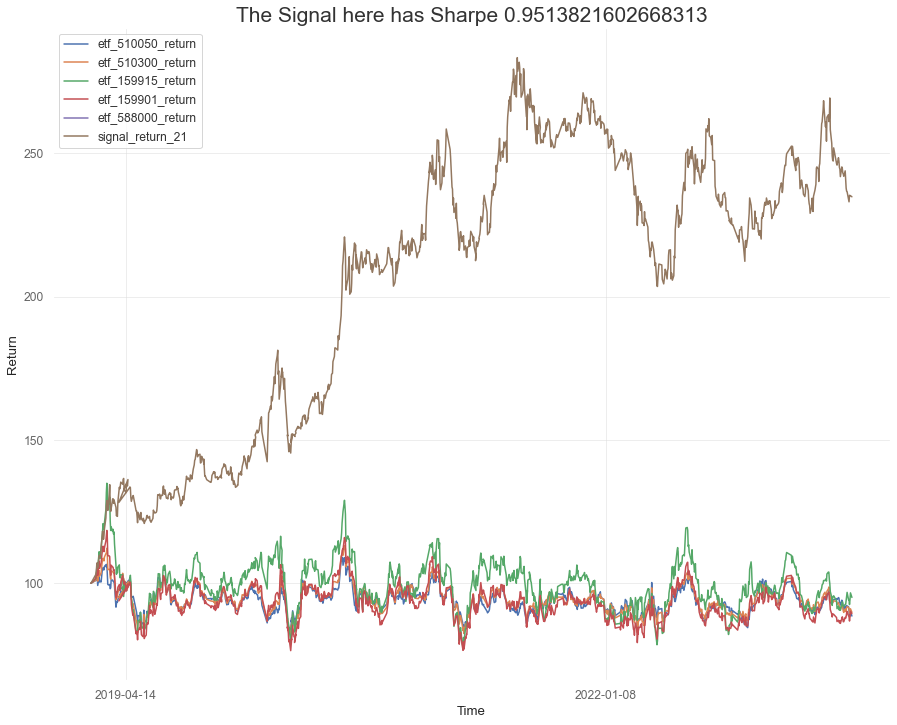

In [85]:
# 绘制曲线图
# %matplotlib notebook
_ = plt.figure(figsize=(15, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data["etf_510050_return"].index),data["etf_510050_return"].values)
_ = plt.plot(np.array(data["etf_510300_return"].index),data["etf_510300_return"].values)
_ = plt.plot(np.array(data["etf_159915_return"].index),data["etf_159915_return"].values)
_ = plt.plot(np.array(data["etf_159901_return"].index),data["etf_159901_return"].values)
_ = plt.plot(np.array(data["etf_588000_return"].index),data["etf_588000_return"].values)
_ = plt.plot(np.array(data["signal_return_21"].index),data["signal_return_21"].values)
_ = plt.legend(['etf_510050_return', 'etf_510300_return', "etf_159915_return", 'etf_159901_return', "etf_588000_return", 'signal_return_21']) 

ax = plt.gca()
plt.title(f'The Signal here has Sharpe {result.iloc[2,0]}', fontname='Arial', fontsize=21)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
# plt.show()

In [84]:
# 计算策略表现指标
result = {}
for i in ["signal_return_21", "etf_510050_return","etf_510300_return","etf_159915_return","etf_159901_return","etf_588000_return"]:
    result[i] = []
    for j in ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]:
        exec( f"r = qs.stats.{j}(data[i])")
        result[i].append(r)

result = pd.DataFrame(result, index=["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"])

print(result)

              signal_return_21  etf_510050_return  etf_510300_return  \
avg_return            0.000938           0.000009           0.000039   
volatility            0.246675           0.250695           0.266584   
sharpe                0.951382           0.009300           0.037113   
max_drawdown         -0.281762          -0.236394          -0.273463   
win_rate              0.513849           0.500475           0.516619   

              etf_159915_return  etf_159901_return  etf_588000_return  
avg_return             0.000275           0.000124                NaN  
volatility             0.403344           0.340846                0.0  
sharpe                 0.171578           0.091370                NaN  
max_drawdown          -0.425004          -0.354312                NaN  
win_rate               0.505223           0.513770                0.0  


### Comparison

In [86]:
comparison = data.copy()

In [87]:
etf_510050 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510050.csv")
etf_510300 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510300.csv")
etf_510500 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510500.csv")
etf_159915 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159915.csv")
etf_159901 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159901.csv")
etf_588000 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\588000.csv")

In [88]:
etf_510050 = etf_510050[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510300 = etf_510300[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510500 = etf_510500[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159915 = etf_159915[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159901 = etf_159901[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_588000 = etf_588000[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')

In [89]:
# Change the name of a column
etf_510050 = etf_510050.rename(columns={'AccumulatedUnitNV': "etf_510050"})
etf_510300 = etf_510300.rename(columns={'AccumulatedUnitNV': "etf_510300"})
etf_510500 = etf_510500.rename(columns={'AccumulatedUnitNV': "etf_510500"})
etf_159915 = etf_159915.rename(columns={'AccumulatedUnitNV': "etf_159915"})
etf_159901 = etf_159901.rename(columns={'AccumulatedUnitNV': "etf_159901"})
etf_588000 = etf_588000.rename(columns={'AccumulatedUnitNV': "etf_588000"})

In [90]:
# 合并数据
data = pd.concat([etf_510050, etf_510300], axis=1)
data = pd.concat([data, etf_510500], axis=1)
data = pd.concat([data, etf_159915], axis=1)
data = pd.concat([data, etf_159901], axis=1)
data = pd.concat([data, etf_588000], axis=1)
data.index = pd.to_datetime(data.index)

In [91]:
data = data[3405:]

In [92]:
# 计算每日涨跌幅和滚动收益率
data["etf_510050_day_return"] = data.etf_510050.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_510300_day_return"] = data.etf_510300.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_510500_day_return"] = data.etf_510500.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159915_day_return"] = data.etf_159915.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159901_day_return"] = data.etf_159901.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_588000_day_return"] = data.etf_588000.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])

In [93]:
# 生成交易信号和收益率_21
data["etf_510050_return"] = data.etf_510050.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_510300_return"] = data.etf_510300.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_510500_return"] = data.etf_510500.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159915_return"] = data.etf_159915.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159901_return"] = data.etf_159901.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_588000_return"] = data.etf_588000.rolling(window=21).apply(lambda x: x[-1]/x[0])

In [94]:
data = data.iloc[21:,:]

In [95]:
data["signal_510050"] = [0] * len(data)
data["signal_510300"] = [0] * len(data)
data["signal_510500"] = [0] * len(data)
data["signal_159915"] = [0] * len(data)
data["signal_159901"] = [0] * len(data)
data["signal_588000"] = [0] * len(data)

In [96]:
for row in range(len(data)):
    value = data.iloc[row][12:18].max()
    series = data.iloc[row]
    position = series[series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position + 6
    data.loc[data.index[row],series.index[new_position]] = 1

In [97]:
data["signal_510050"] = data["signal_510050"].shift(1)
data["signal_510300"] = data["signal_510300"].shift(1)
data["signal_510500"] = data["signal_510500"].shift(1)
data["signal_159915"] = data["signal_159915"].shift(1)
data["signal_159901"] = data["signal_159901"].shift(1)
data["signal_588000"] = data["signal_588000"].shift(1)

In [98]:
data = data[1:]

In [99]:
data["signal_return_21"] = [0] * len(data)
arr = []
for row in range(len(data)):
    value = data.iloc[row][18:24].max()
    series = data.iloc[row]
    position = series[18:24][series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position - 12
    arr.append(series[new_position] + 1)

#     data.loc[data.index[row],'signal_return_21'] = np.cumprod((series[new_position] + 1))*100
data['arr'] = arr
data["signal_return_21"] = np.cumprod(arr, axis=0)*100

In [100]:
#####################################################################
data['signal_return_21'] = data['signal_return_21']*(100/data.loc[:,"signal_return_21"][0])
data['etf_510050_return'] = data['etf_510050_return']*(100/data.loc[:,"etf_510050_return"][0])
data['etf_510300_return'] = data['etf_510300_return']*(100/data.loc[:,"etf_510300_return"][0])
data['etf_510500_return'] = data['etf_510500_return']*(100/data.loc[:,"etf_510500_return"][0])
data['etf_159915_return'] = data['etf_159915_return']*(100/data.loc[:,"etf_159915_return"][0])
data['etf_159901_return'] = data['etf_159901_return']*(100/data.loc[:,"etf_159901_return"][0])
data['etf_588000_return'] = data['etf_588000_return']*(100/data.loc[:,"etf_588000_return"][432])

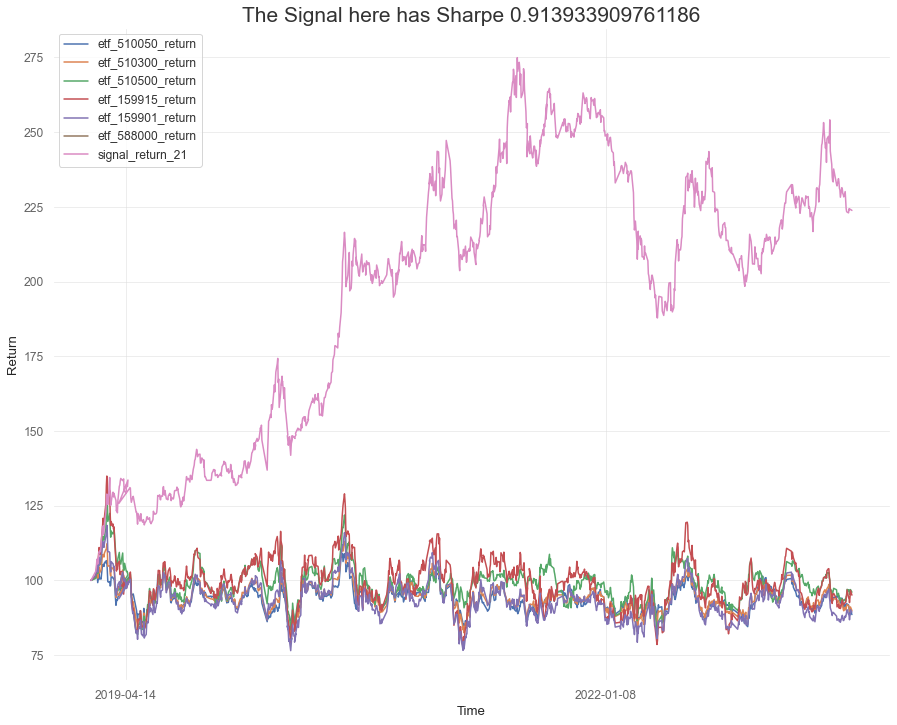

In [102]:
# 绘制曲线图
# %matplotlib notebook
_ = plt.figure(figsize=(15, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data["etf_510050_return"].index),data["etf_510050_return"].values)
_ = plt.plot(np.array(data["etf_510300_return"].index),data["etf_510300_return"].values)
_ = plt.plot(np.array(data["etf_510500_return"].index),data["etf_510500_return"].values)
_ = plt.plot(np.array(data["etf_159915_return"].index),data["etf_159915_return"].values)
_ = plt.plot(np.array(data["etf_159901_return"].index),data["etf_159901_return"].values)
_ = plt.plot(np.array(data["etf_588000_return"].index),data["etf_588000_return"].values)
_ = plt.plot(np.array(data["signal_return_21"].index),data["signal_return_21"].values)
_ = plt.legend(['etf_510050_return', 'etf_510300_return', "etf_510500_return", "etf_159915_return", 'etf_159901_return', "etf_588000_return", 'signal_return_21']) 


ax = plt.gca()
plt.title(f'The Signal here has Sharpe {result.iloc[2,0]}', fontname='Arial', fontsize=21)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
# plt.show()

In [103]:
# 计算策略表现指标
result = {}
for i in ["signal_return_21", "etf_510050_return","etf_510300_return","etf_159915_return","etf_159901_return","etf_588000_return"]:
    result[i] = []
    for j in ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]:
        exec( f"r = qs.stats.{j}(data[i])")
        result[i].append(r)

result = pd.DataFrame(result, index=["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"])

print(result)

              signal_return_21  etf_510050_return  etf_510300_return  \
avg_return            0.000888           0.000009           0.000039   
volatility            0.243215           0.250695           0.266584   
sharpe                0.913934           0.009300           0.037113   
max_drawdown         -0.316834          -0.236394          -0.273463   
win_rate              0.531041           0.500475           0.516619   

              etf_159915_return  etf_159901_return  etf_588000_return  
avg_return             0.000275           0.000124                NaN  
volatility             0.403344           0.340846                0.0  
sharpe                 0.171578           0.091370                NaN  
max_drawdown          -0.425004          -0.354312                NaN  
win_rate               0.505223           0.513770                0.0  


In [104]:
data['(21)signal_return_21'] = comparison['signal_return_21']

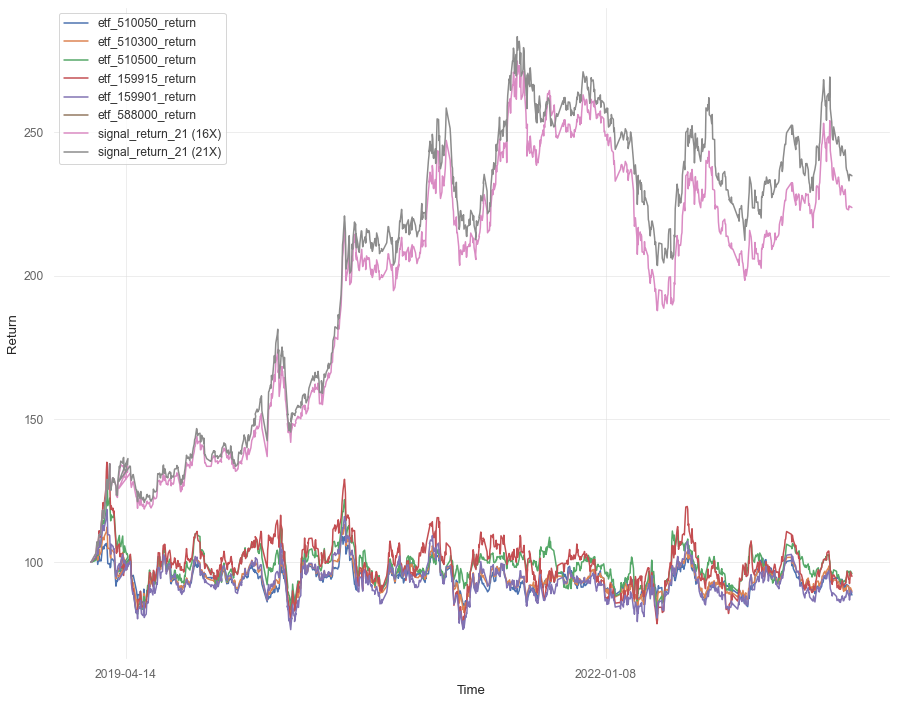

In [105]:
_ = plt.figure(figsize=(15, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data["etf_510050_return"].index),data["etf_510050_return"].values)
_ = plt.plot(np.array(data["etf_510300_return"].index),data["etf_510300_return"].values)
_ = plt.plot(np.array(data["etf_510500_return"].index),data["etf_510500_return"].values)
_ = plt.plot(np.array(data["etf_159915_return"].index),data["etf_159915_return"].values)
_ = plt.plot(np.array(data["etf_159901_return"].index),data["etf_159901_return"].values)
_ = plt.plot(np.array(data["etf_588000_return"].index),data["etf_588000_return"].values)
_ = plt.plot(np.array(data["signal_return_21"].index),data["signal_return_21"].values)
_ = plt.plot(np.array(data["(21)signal_return_21"].index),data["(21)signal_return_21"].values)
_ = plt.legend(['etf_510050_return', 'etf_510300_return', "etf_510500_return", "etf_159915_return", 'etf_159901_return', "etf_588000_return", 'signal_return_21 (16X)', 'signal_return_21 (21X)']) 

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))